# Import packages and process data

In [1]:
import pandas as pd
import numpy as np
import csv
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import xgboost as xgb
import matplotlib.pyplot as plt

In [2]:
dataroot = 'koi_2000.csv'
testroot = 'koi_test.csv'
dropped = ['loc_rowid','kepid','kepoi_name','koi_disposition']

# open training csv file
with open(dataroot, newline='') as csvfile:
  df = pd.read_csv(dataroot)
# drop unused columns
df = df.drop(columns=dropped)
df = df.dropna()
data = df.to_numpy()

# open testing csv file
with open(testroot,newline='') as csvfile:
  test_df = pd.read_csv(testroot)
# drop unused columns
test_df = test_df.drop(columns=dropped)
test_df = test_df.dropna()
test_data = test_df.to_numpy()

# extract features columns
features = df.columns[:-1]

# Split data into training and testing

In [3]:
# split dataset into training and validation
x = data[:,:-1]
y = data[:,-1:].flatten()
x_train,_, y_train,_ = train_test_split(x, y, train_size=1517,shuffle = False)
print(x_train.shape)
print(y_train.shape)

(1517, 14)
(1517,)


In [4]:
x_test = test_data[:,:-1]
y_test = test_data[:,-1:].flatten()
print(x_test.shape)
print(y_test.shape)

(367, 14)
(367,)


# 1. sklearn RandomForestClassifier

In [27]:
# train RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)  
clf.fit(x_train, y_train)
y_pred1 = clf.predict(x_test)

## a. RandomForestClassifier's f1 score and classification report

In [28]:
print(f'f1 score: {metrics.f1_score(y_test, y_pred1)}') # f1 score

f1 score: 0.8514851485148515


In [29]:
print(metrics.classification_report(y_test,y_pred1)) # classification report

              precision    recall  f1-score   support

         0.0       0.90      0.75      0.82       180
         1.0       0.79      0.92      0.85       187

    accuracy                           0.84       367
   macro avg       0.85      0.83      0.83       367
weighted avg       0.85      0.84      0.84       367



## b. RandomForestClassifier's feature importance

In [30]:
# get feature importance data
importances = clf.feature_importances_
# display feature importance as dataframe
feature_imp_df1 = pd.DataFrame({'Feature':features,'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 
print(feature_imp_df1)

          Feature  Gini Importance
1      koi_impact         0.265370
3       koi_depth         0.138214
6   koi_model_snr         0.097773
7       koi_steff         0.057907
9        koi_smet         0.054689
4         koi_teq         0.053084
0      koi_period         0.051126
5       koi_insol         0.049712
10       koi_srad         0.042570
11      koi_smass         0.038851
2    koi_duration         0.038331
8       koi_slogg         0.037975
12             ra         0.037561
13            dec         0.036838


## c. RandomForestClassifier's confusion matrix

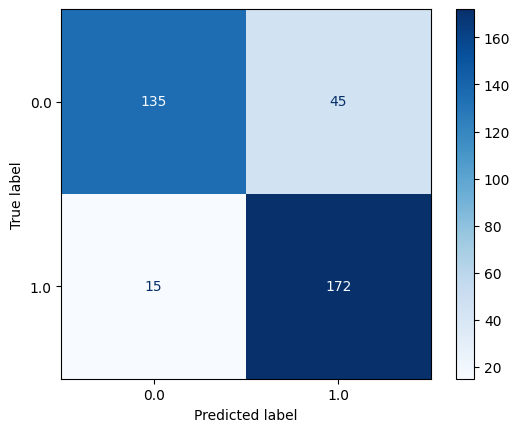

In [31]:
# confusion matrix
cm1 = metrics.confusion_matrix(y_test,y_pred1,labels=clf.classes_)
display1 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=clf.classes_)
display1.plot(cmap=plt.cm.Blues).figure_.savefig('confusion_matrix.png')

# 2. XGBClassifier

In [32]:
# train XGBClassifier
model = xgb.XGBClassifier()
model.fit(x_train,y_train)
y_pred2 = model.predict(x_test)

## a. XGBClassifier's f1 score and classification report

In [33]:
print(metrics.f1_score(y_test,y_pred2)) # f1 score

0.8522167487684729


In [34]:
print(metrics.classification_report(y_test,y_pred2)) # classification report

              precision    recall  f1-score   support

         0.0       0.91      0.74      0.82       180
         1.0       0.79      0.93      0.85       187

    accuracy                           0.84       367
   macro avg       0.85      0.83      0.83       367
weighted avg       0.85      0.84      0.83       367



## b. XGBClassifier's feature importance

In [35]:
# get gain score
gain = model.get_booster().get_score(importance_type="gain")
gain_score = np.array(list(gain.values()))

In [36]:
# display feature importance as dataframe
feature_imp_df2 = pd.DataFrame({'Feature':features,'Gain': gain_score}).sort_values('Gain', ascending=False) 
print(feature_imp_df2)

          Feature      Gain
1      koi_impact  6.746367
5       koi_insol  3.764662
3       koi_depth  3.209904
6   koi_model_snr  2.723500
4         koi_teq  1.894486
9        koi_smet  1.870420
0      koi_period  1.344269
10       koi_srad  1.216147
11      koi_smass  1.145631
13            dec  1.054322
7       koi_steff  1.037078
2    koi_duration  0.998991
12             ra  0.811657
8       koi_slogg  0.807274


## c. XGBClassifier's confusion matrix

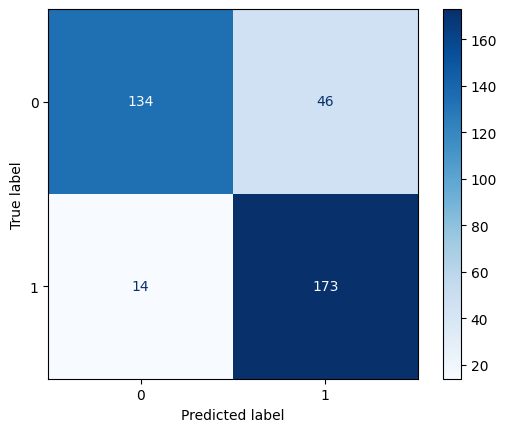

In [37]:
# confusion matrix
cm2 = metrics.confusion_matrix(y_test,y_pred2,labels=model.classes_)
display2 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=model.classes_)
display2.plot(cmap=plt.cm.Blues).figure_.savefig('confusion_matrix2.png')